In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
data = pd.read_csv('data_for_lr.csv')

# Drop the missing values
data = data.dropna()
 
# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output  = np.array(data.y[0:500]).reshape(500,1)
 
# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output  = np.array(data.y[500:700]).reshape(199,1)

In [15]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        predictions = np.multiply(train_input, self.parameters['m'])+self.parameters['c']
        return predictions 

    def cost_function(self, predictions, train_output):
        return np.mean((predictions-train_output)**2)

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        derivatives['dm'] = np.mean((predictions-train_output)*train_input)*2
        derivatives['dc'] = np.mean(predictions-train_output)*2
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m']-learning_rate*derivatives['dm']
        self.parameters['c'] = self.parameters['c']-learning_rate*derivatives['dc']

    def train(self, train_input, train_output, learning_rate, iters):

        self.parameters['m'] = np.random.uniform(0,1)*(-1)
        self.parameters['c'] = np.random.uniform(0,1)*(-1)

        # initialize loss
        self.loss = []

        for i in range(iters):
            # forward propagation
            predictions = self.forward_propagation(train_input)

            # cost function
            cost = self.cost_function(predictions, train_output)

            # save loss
            self.loss.append(cost)
            print(f"Iteration = {i+1}, Loss = {cost}")

            # backward propagation
            derivatives = self.backward_propagation(train_input, train_output, predictions)

            # update parameters
            self.update_parameters(derivatives, learning_rate)

        return self.parameters, self.loss

In [17]:
#Example usage
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)

Iteration = 1, Loss = 12353.545916281559
Iteration = 2, Loss = 1495.6205134706502
Iteration = 3, Loss = 187.12233871713275
Iteration = 4, Loss = 29.434068153846972
Iteration = 5, Loss = 10.430914923217767
Iteration = 6, Loss = 8.140827594783234
Iteration = 7, Loss = 7.8648465903024904
Iteration = 8, Loss = 7.831587316757177
Iteration = 9, Loss = 7.8275786533049825
Iteration = 10, Loss = 7.827095006749897
Iteration = 11, Loss = 7.8270361631488035
Iteration = 12, Loss = 7.827028512982962
Iteration = 13, Loss = 7.827027032239496
Iteration = 14, Loss = 7.8270262950348615
Iteration = 15, Loss = 7.827025647491042
Iteration = 16, Loss = 7.827025010808609
Iteration = 17, Loss = 7.827024375491378
Iteration = 18, Loss = 7.827023740394941
Iteration = 19, Loss = 7.827023105381382
Iteration = 20, Loss = 7.827022470434074


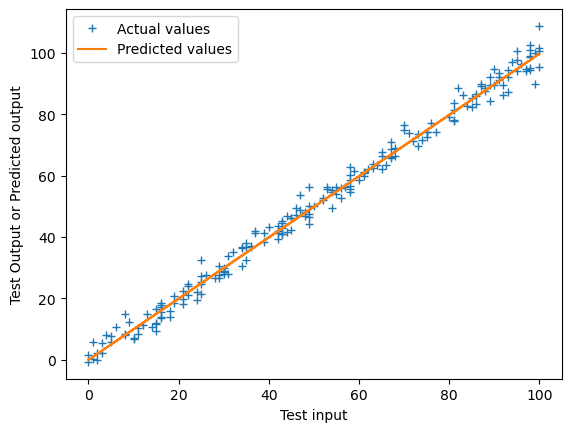

In [18]:
#Prediction on test data
y_pred = test_input*parameters['m'] + parameters['c']

# Plot the regression line with actual data pointa
plt.plot(test_input, test_output, '+', label='Actual values')
plt.plot(test_input, y_pred, label='Predicted values')
plt.xlabel('Test input')
plt.ylabel('Test Output or Predicted output')
plt.legend()
plt.show()